a-Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8. 

In [154]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [155]:
img = cv2.imread('telefe.jpg')
#img_bgr = cv2.imread('messi.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Defino la función para muestreo. Le paso una imagen y el factor de muestreo (2,4,8).Lo que devuelve es una imagen que, si factor = 2, se toma un píxel cada dos filas y dos columnas.

In [156]:
# Función para aplicar muestreo
def muestreo(imagen, factor):
    return imagen[::factor, ::factor]


In [157]:
# Aplicar muestreo con factores 2, 4 y 8
img_2 = muestreo(img, 2)
img_4 = muestreo(img, 4)
img_8 = muestreo(img, 8)

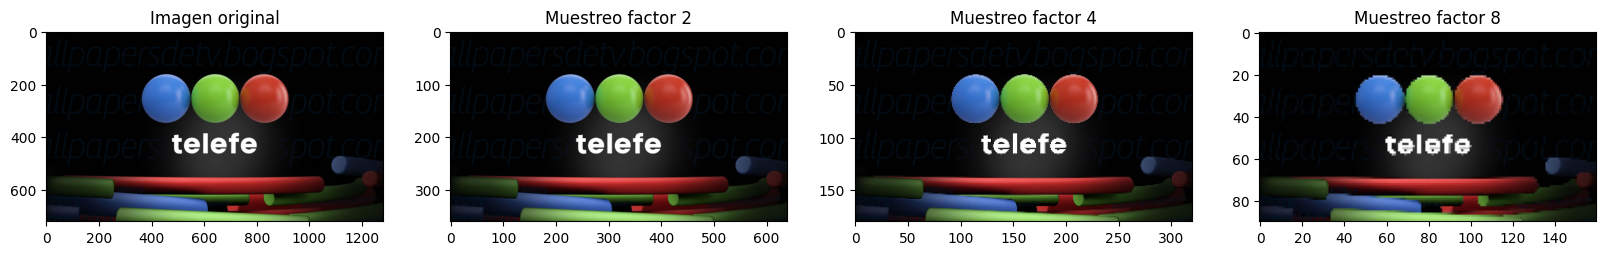

In [158]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(img)
axes[0].set_title('Imagen original')
axes[1].imshow(img_2)
axes[1].set_title('Muestreo factor 2')
axes[2].imshow(img_4)
axes[2].set_title('Muestreo factor 4')
axes[3].imshow(img_8)
axes[3].set_title('Muestreo factor 8')
plt.show()

Dimensiones de la imagen: (720, 1280, 3)
Tipo de datos: uint8
Tamaño en memoria (bytes): 2764800


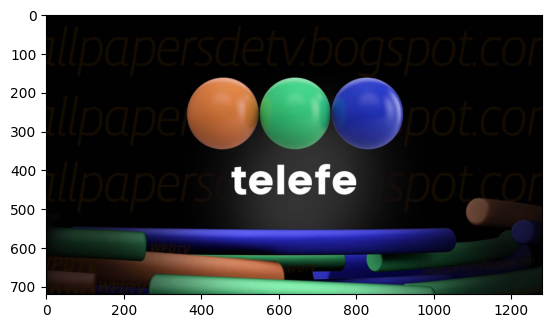

In [159]:
#img_bgr = cv2.imread('messi.jpg')
img_bgr = cv2.imread('telefe.jpg')
#img_bgr = cv2.imread('messi.jpg')
# Información básica de la imagen
print("Dimensiones de la imagen:", img_bgr.shape)
print("Tipo de datos:", img_bgr.dtype)
print("Tamaño en memoria (bytes):", img_bgr.nbytes)

# Visualización de la imagen completa
plt.imshow(img_bgr)


b-Para cada caso, calcular:
El nuevo tamaño de la imagen
El porcentaje de reducción de datos

Creo una funcion a la cual le paso el tamaño original y el nuevo y me calcular el % de reducción de datos.

In [160]:
def porcentaje_reduccion(tamaño_original, tamaño_nuevo):
    return ((tamaño_original - tamaño_nuevo) / tamaño_original) * 100

img.shape[0] y img.shape[1] nos dan el número de filas (alto) y columnas (ancho) de la imagen original, respectivamente. Multiplicamos estas dos dimensiones para obtener el número total de píxeles. Lo mismo para el resto de las imagenes.

In [161]:
# Calcular los tamaños
tamaño_original = img.shape[0] * img.shape[1]
tamaño_2 = img_2.shape[0] * img_2.shape[1]
tamaño_4 = img_4.shape[0] * img_4.shape[1]
tamaño_8 = img_8.shape[0] * img_8.shape[1]

In [162]:
# Calcular el porcentaje de reducción
reduccion_2 = porcentaje_reduccion(tamaño_original, tamaño_2)
reduccion_4 = porcentaje_reduccion(tamaño_original, tamaño_4)
reduccion_8 = porcentaje_reduccion(tamaño_original, tamaño_8)

In [163]:
# Calcular los tamaños
tamaño_original = img.shape[0] * img.shape[1]
tamaño_2 = img_2.shape[0] * img_2.shape[1]
tamaño_4 = img_4.shape[0] * img_4.shape[1]
tamaño_8 = img_8.shape[0] * img_8.shape[1]

In [164]:
print(f"Reducción con factor 2: {reduccion_2:.2f}%")
print(f"Reducción con factor 4: {reduccion_4:.2f}%")
print(f"Reducción con factor 8: {reduccion_8:.2f}%")

Reducción con factor 2: 75.00%
Reducción con factor 4: 93.75%
Reducción con factor 8: 98.44%


c-Aplicar cuantización con 4 niveles diferentes (32, 64, 128, 256) 

La cuantización es un proceso que reduce el número de colores o tonos de una imagen.

In [165]:
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img=img_bgr

In [166]:
# Verificar el rango de valores de la imagen
print("Valor mínimo:", img.min())
print("Valor máximo:", img.max())

Valor mínimo: 0
Valor máximo: 255


In [167]:
def cuantizacion(imagen, niveles):
    # Calcular el tamaño de cada intervalo de cuantización
    intervalo = 256 // niveles
    
    # Aplicar la cuantización
    imagen_cuantizada = (imagen // intervalo) * intervalo
    
    # imagen // intervalo es una division entera
    
    return imagen_cuantizada

**Rango de píxeles en imágenes de 8 bits**
Los valores de píxeles en una imagen de 8 bits pueden variar desde 0 (negro) hasta 255 (blanco), lo que nos da un total de 256 posibles valores (de 0 a 255, es decir, 256 valores diferentes).

**¿Por qué 256 y no 255?**
256 niveles posibles: Como los valores de los píxeles van de 0 a 255, el número total de posibles valores es 256 (incluyendo el 0).

Al realizar la cuantización, estamos agrupando esos 256 valores posibles en un número menor de niveles.

Con 4 niveles de cuantización, los píxeles de la imagen que estén en el rango de:

[0, 63] se convertirán a 0

[64, 127] se convertirán a 64

[128, 191] se convertirán a 128

[192, 255] se convertirán a 192

In [168]:
# Aplicar cuantización a la imagen original
img_32 = cuantizacion(img, 32)
img_64 = cuantizacion(img, 64)
img_128 = cuantizacion(img, 128)
img_256 = cuantizacion(img, 256)

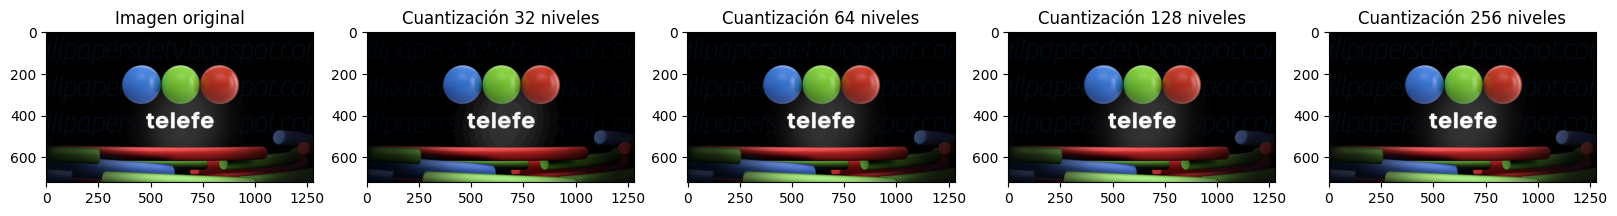

In [169]:
# Mostrar las imágenes cuantizadas
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Imagen original')
axes[1].imshow(img_32, cmap='gray')
axes[1].set_title('Cuantización 32 niveles')
axes[2].imshow(img_64, cmap='gray')
axes[2].set_title('Cuantización 64 niveles')
axes[3].imshow(img_128, cmap='gray')
axes[3].set_title('Cuantización 128 niveles')
axes[4].imshow(img_256, cmap='gray')
axes[4].set_title('Cuantización 256 niveles')
plt.show()

d-¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?

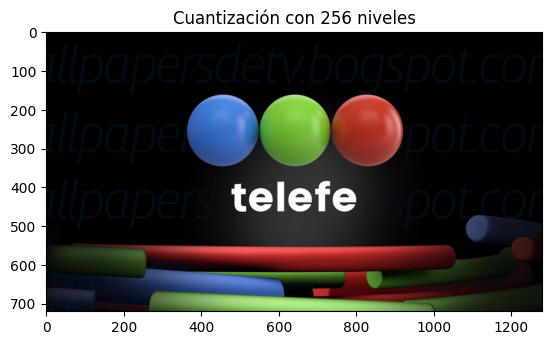

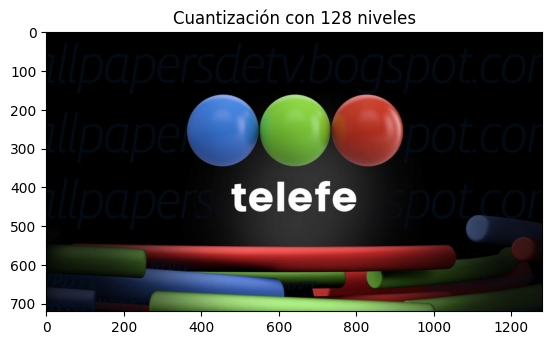

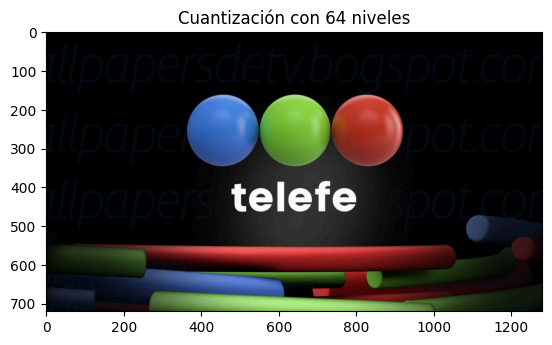

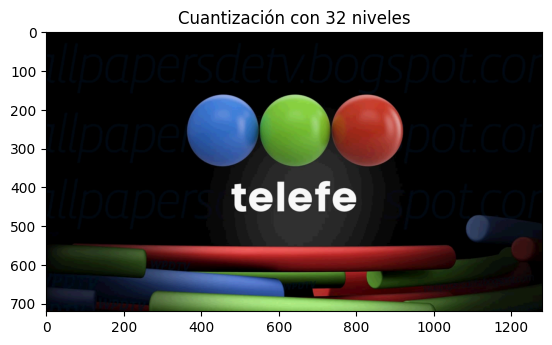

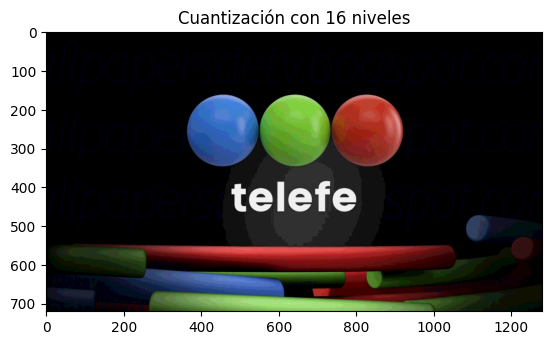

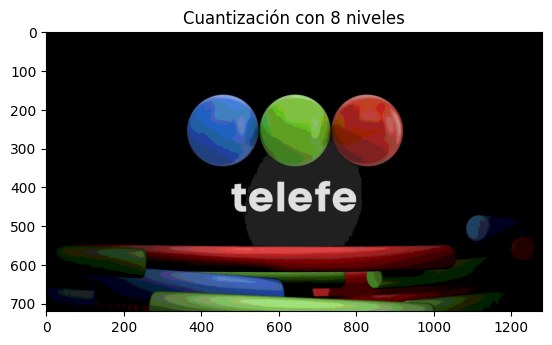

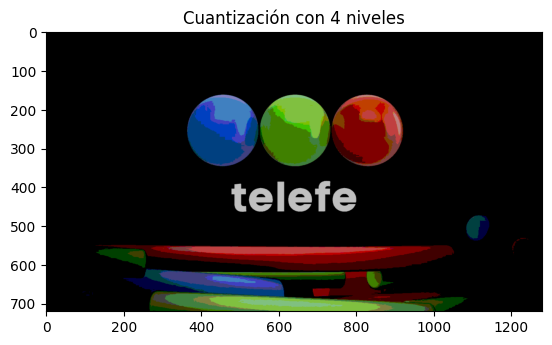

In [170]:
for niveles in [256, 128, 64, 32, 16, 8, 4]:
    imagen_cuantizada = cuantizacion(img, niveles)
    plt.imshow(imagen_cuantizada, cmap='gray')
    plt.title(f"Cuantización con {niveles} niveles")
    plt.show()

Un nivel significativo de degradación yo lo noto a partir de los 16.